In [4]:
import json
from collections import Counter
path = ["/world/data-gpu-112/kebo/datasets/NAIC_ReID/stage1/train_all.txt"]
for p in path:
    labels2paths = {}
    label_list = []
    with open(p, "r") as f:
        lines = f.readlines()
        for line in lines:
            path, label = line.split(" ")
            if not label in labels2paths:
                labels2paths[label] = [path]
            else:
                labels2paths[label].append(path)
            label_list.append(label)
    print("[naic] imgs:%s, labels:%s"%(len(label_list), len(labels2paths)))

[naic] imgs:20429, labels:4768


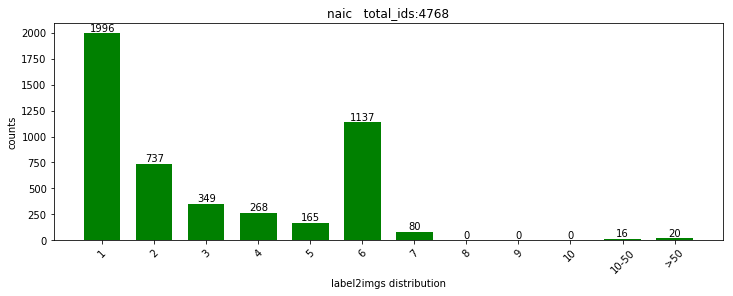

In [12]:
import matplotlib.pyplot as plt

def get_scope(labels2paths):
    label_lst = []
    scope = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "10-50", ">50"]
    scope_cnt = [0] * 12
    for label, paths in labels2paths.items():
        if len(paths) < 10:
            scope_cnt[len(paths)-1] += 1
        elif len(paths) > 50:
            scope_cnt[-1] += 1
        else:
            scope_cnt[-2] += 1
    return scope, scope_cnt

def distribution(scope, scope_cnt):
    plt.figure(figsize=(12,4))
    num_bins = 12
    plt.bar(scope, scope_cnt, width=0.7, color="green", align="center")
    for a, b in zip(scope, scope_cnt):
        plt.text(a, b+0.5, '%.0f' % b, ha='center', va='bottom', fontsize=10)
    plt.xticks(range(len(scope)), scope, rotation=45)
    plt.xlabel('label2imgs distribution')
    plt.ylabel('counts')
    plt.title("naic" + "   total_ids:%s"%len(labels2paths))
    plt.show()

scope, scope_cnt = get_scope(labels2paths)
distribution(scope, scope_cnt)